### Background : 
You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

The company in the last campaign contacted the customers at random without looking at the available information. However, this time company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being, and wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

### Objective : 

* To predict which customer is more likely to purchase the newly introduced travel package


### Dataset :

Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer


### Import necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to split data
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
import scipy.stats as stats
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


### Read the dataset

In [2]:
tr =pd.read_excel("Tourism.xlsx",sheet_name="Tourism")

In [3]:
# copying data to another varaible to avoid any changes to original data
data=tr.copy()

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### View random sample of data

In [6]:
np.random.seed(1)  # to get the same random results every time
data.sample(n=10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


### Understand the shape of the dataset.

In [7]:
data.shape

(4888, 20)

* The dataset has 4888 rows and 20 columns of data

### Check the data types of the columns for the dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Observations -**
* There are null values in some columns of the dataset.
* We can convert the object type columns to categories.
* Some integer type columns in the dataset would serve our analysis better as categories

`converting "objects" to "category" reduces the data space required to store the dataframe`

### Fixing the data types

In [9]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [10]:
for c in cols.columns:
    data[c] = data[c].astype('category')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

`we can see that the memory usage has decreased from 763.9 KB to 564.5 KB`, this technique is generally useful for bigger datasets.

### Summary of the dataset.

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


* CustomerID is an ID variable and not useful for predictive modelling.
* Age of the customers range from 18 to 61 years and the average age is 37 years.
* The difference between the 75th percentile and maximum value in DurationOfPitch indicates the prescence of outliers.
* The difference between the 75th percentile and maximum value in NumberOfTrips indicates the prescence of outliers.
* NumberOfChildrenVisiting has 0 as minimum value for customers visiting with no children.
* Monthly Income has a high range and the difference in 75th percentile and maximum value indicates the presence of outliers.
* We will be converting ProdTaken, City Tier, Passport and OwnCar to "Category".

In [13]:
cat_group = ['ProdTaken','CityTier','Passport','OwnCar']

In [14]:
# convert to category
for cat in cat_group:
    data[cat] = data[cat].astype("category")

In [15]:
data.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
Designation,4888,5,Executive,1842


* ProdTaken is our target variable with a large percentage of customers that have not purchased the package.
* Majority of the customers made self enquiry.
* Majority of the customers are city tier 1.
* There are more car owners and fewer passport holders.
* There are more male customers and married folk.

**Dropping columns which are not adding any information.**

In [16]:
data.drop(['CustomerID'],axis=1,inplace=True)

**Let's look at the unqiue values of all the categories**

In [17]:
cols_cat= data.select_dtypes(['category'])

In [18]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
************

## Data Preprocessing

**We will attempt to change the 'Fe Male' values to 'Female'**

In [19]:
#change Fe Male to female in gender column
def fix_gender(gen):
    if gen == 'Male':
        return 'Male'
    if gen == 'Female': 
        return 'Female'
    if gen == 'Fe Male': 
        return 'Female'
    else:
        pass

In [20]:
data["Gender"] = data["Gender"].apply(fix_gender)

In [21]:
data["Gender"].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

### EDA

### Univariate analysis

In [22]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 9), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,9))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on Age

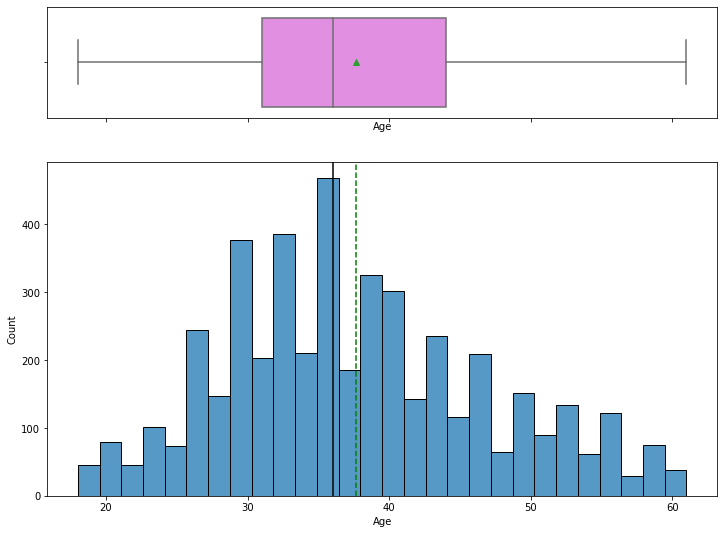

In [23]:
histogram_boxplot(data,'Age')

* Age is looking normally distributed, with a hint of right skew.
* There are no outliers in this column

### Observations on DurationOfPitch

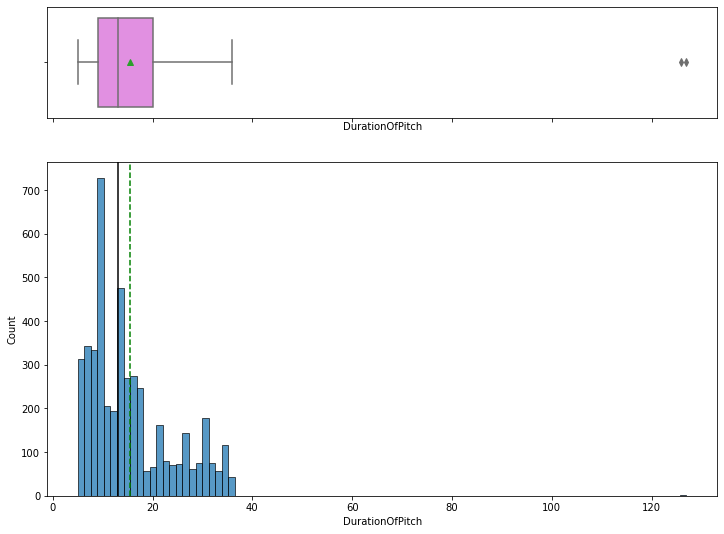

In [24]:
histogram_boxplot(data,'DurationOfPitch')

* DurationOfPitch is heavily skewed to the right
* This could be explained by the prescence of outliers that were pitched to for about two hours(120 minutes).
* We would assume that to be a rare long enquiry.

### Observations on NumberOfPersonVisiting

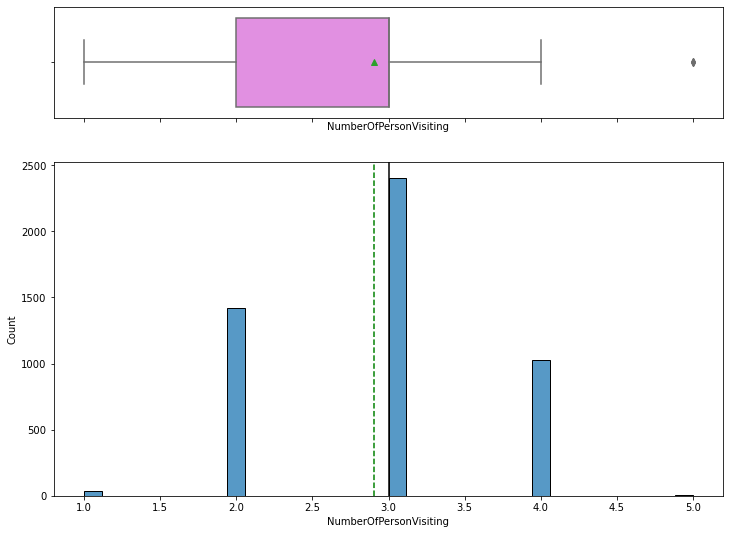

In [25]:
histogram_boxplot(data,'NumberOfPersonVisiting')

* Number of people planning to take the trip with the customers are usually 3.
* Other frequent numbers are 2 and 4 persons
* Outlier at 5 persons

### Observations on NumberOfFollowups

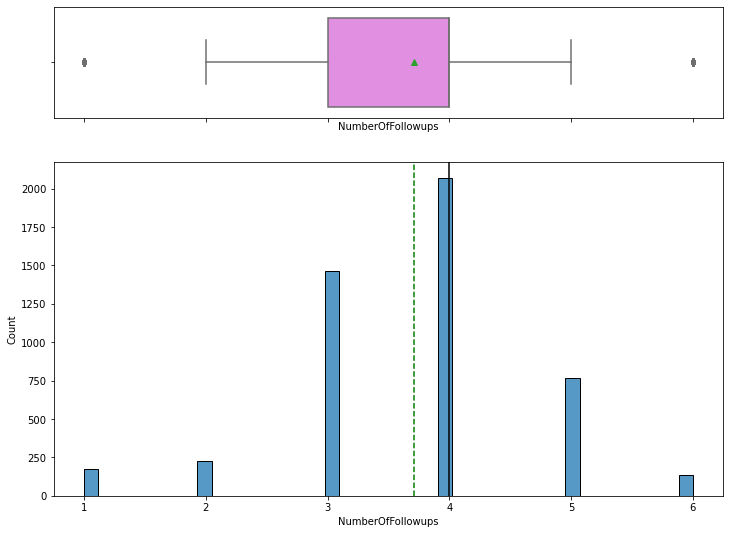

In [26]:
histogram_boxplot(data, 'NumberOfFollowups')

* Salespersons follow up 4 times frequently.
* Other Salespersons follow up at least 3 0r 5 times.
* Outliers are 1 and 6 times

### Observations on PreferredPropertyStar

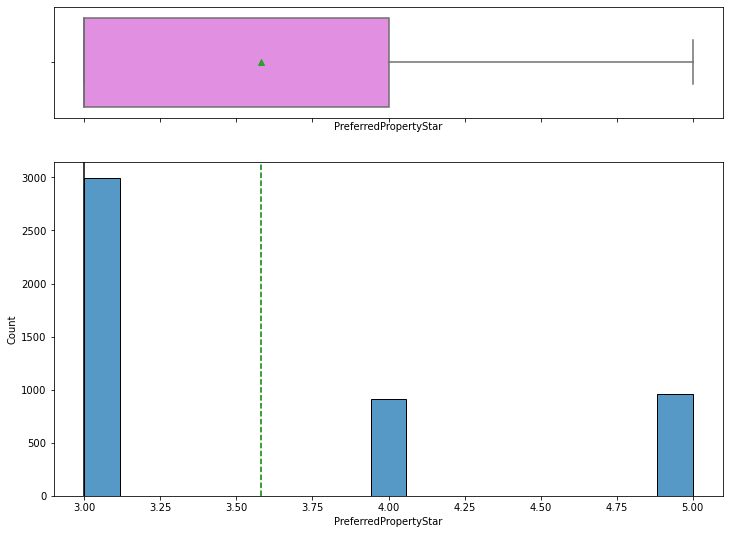

In [27]:
histogram_boxplot(data,'PreferredPropertyStar')

* Preferred hotel property rating is mostly 3.
* Skewed to the right.

### Observations on NumberOfTrips

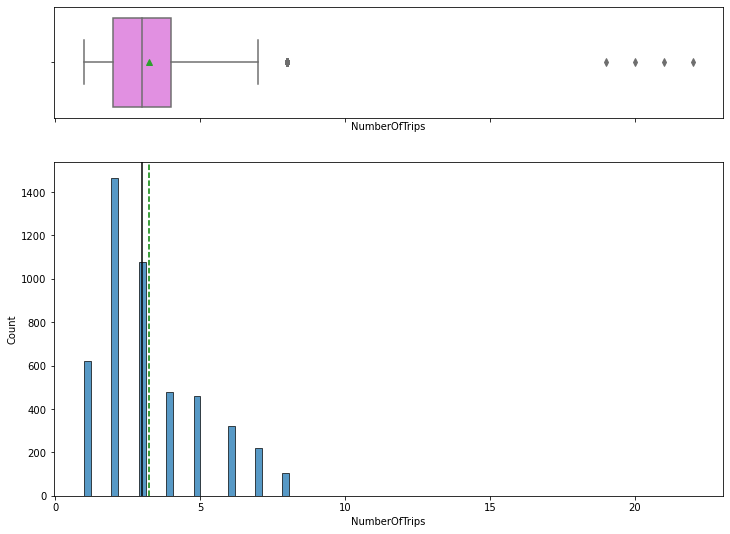

In [28]:
histogram_boxplot(data,'NumberOfTrips')

* Customers take less than 10 trips on average in a year.
* We have outliers who take up to 20 trips on average.
* Variable skewed to the right.

### Observations on PitchSatisfactionScore

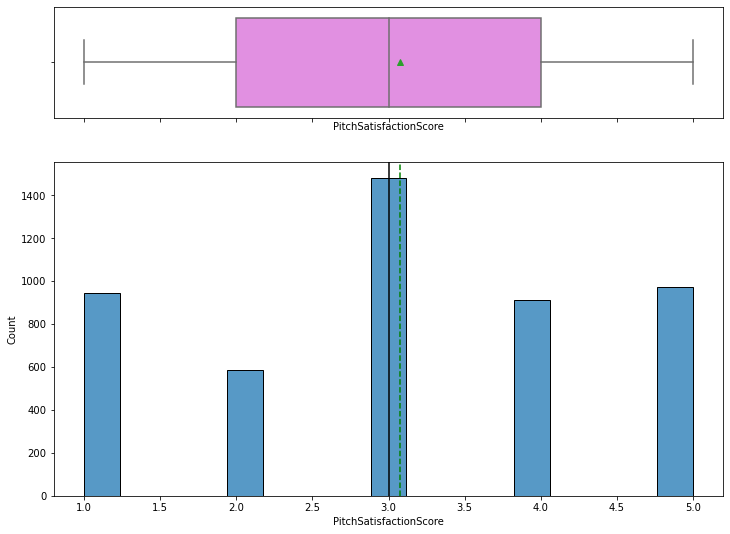

In [29]:
histogram_boxplot(data,'PitchSatisfactionScore')

* Sales pitch satisfaction score has median of 3.
* No outliers in variable.

### Observations on NumberOfChildrenVisiting

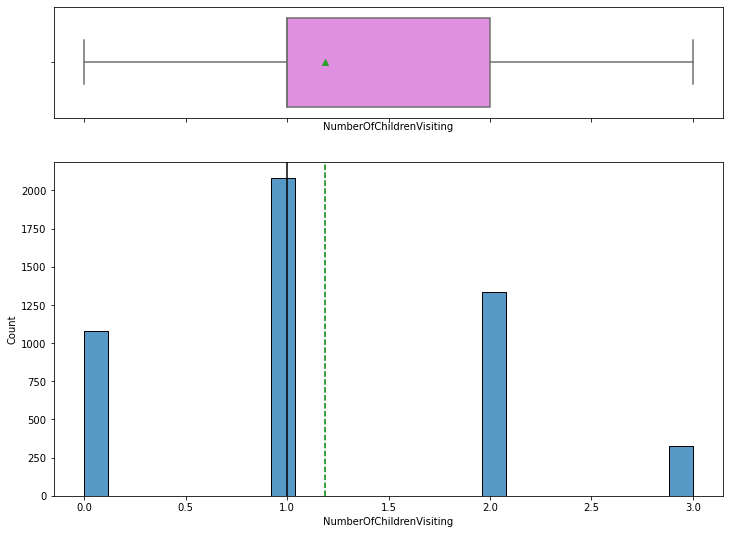

In [30]:
histogram_boxplot(data,'NumberOfChildrenVisiting')

* There is a smaller percentage of customers with children less than 5.

### Observations on MonthlyIncome

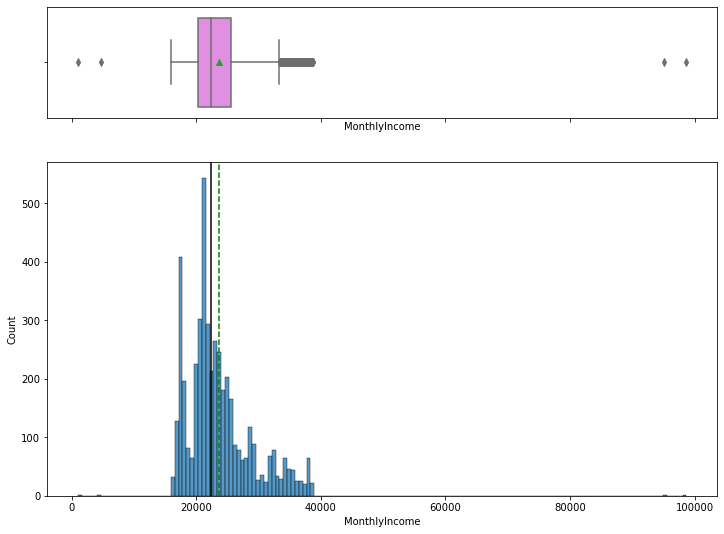

In [31]:
histogram_boxplot(data, 'MonthlyIncome')

* Most of the customer monthly income is between 20000 and 40000 dollars.
* We have outliers on both sides.
* Monthly income is skewed to the right.

In [32]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on TypeofContact

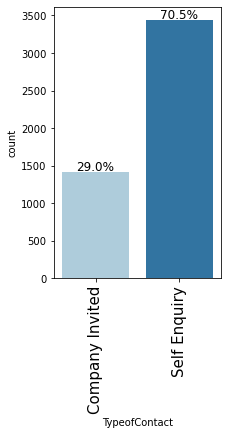

In [33]:
labeled_barplot(data, 'TypeofContact', perc=True)

* 70.5% of customers made self enquiry while 29% were invited by the company.

### Observations on CityTier

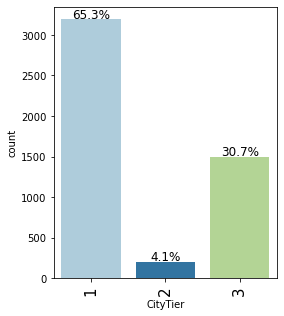

In [34]:
labeled_barplot(data, "CityTier", perc=True)

* 65.3% of customers are City tier 1 followed by 30.7% in tier 3.

### Observations on Occupation

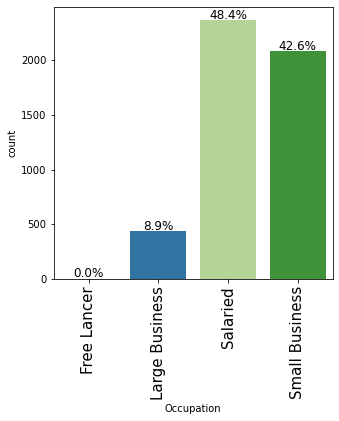

In [35]:
labeled_barplot(data, 'Occupation', perc=True)

* 48.4% are salary earners, 42.6% have small businesses and 8.9% have large businesses.
* We don't seem to have any freelance customers.

### Observations on Gender

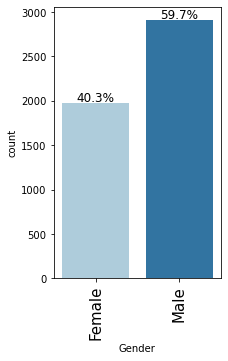

In [36]:
labeled_barplot(data, 'Gender', perc=True)

* 59.7% are male customers and 40.3% are female customers.

### Observations on ProductPitched

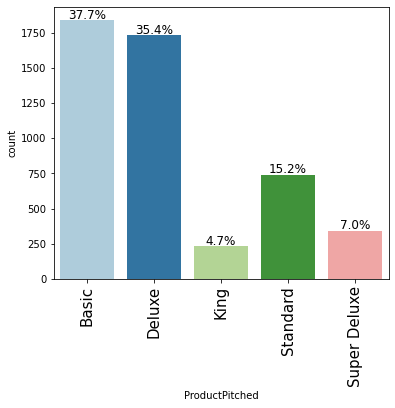

In [37]:
labeled_barplot(data, 'ProductPitched', perc=True)

* A larger percentage of customers were pitched the Basic and Deluxe packages in comparison to the Standard, Super Deluxe and King packages.

### Observations on MaritalStatus

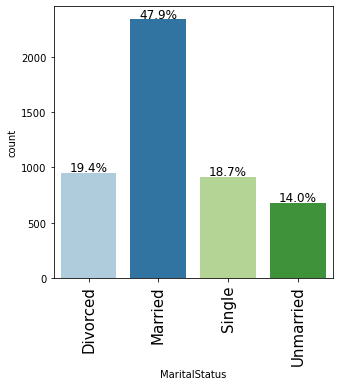

In [38]:
labeled_barplot(data,'MaritalStatus', perc=True)

* 47.9% are married, 19.4% are divorced and the others are single or unmarried.

### Observations on Passport

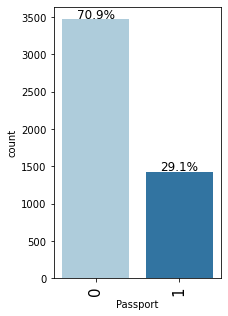

In [39]:
labeled_barplot(data, "Passport", perc=True)

* 29.1% of the customers have a passport.

### Observations on OwnCar

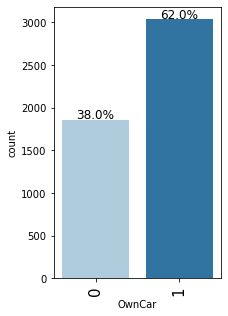

In [40]:
labeled_barplot(data, "OwnCar", perc=True)

* 62% of customers own a car.

### Observations on Designation

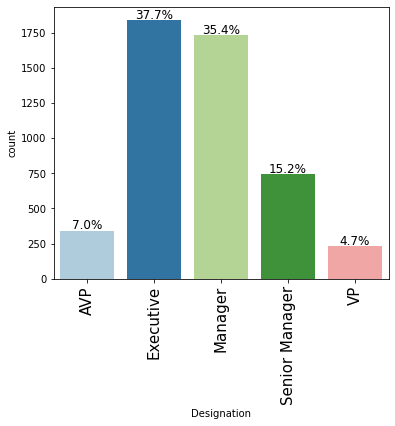

In [41]:
labeled_barplot(data, "Designation", perc=True)

* 37.7% and 35.4% are Executives and Managers respectively. Followed by 15.2% of the customers as Senior Managers.

### Observations on ProdTaken

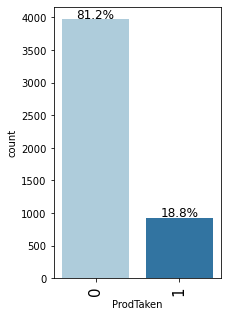

In [42]:
labeled_barplot(data, "ProdTaken", perc=True)

* 18.8% of the customers have purchased a package.

## Bivariate Analysis

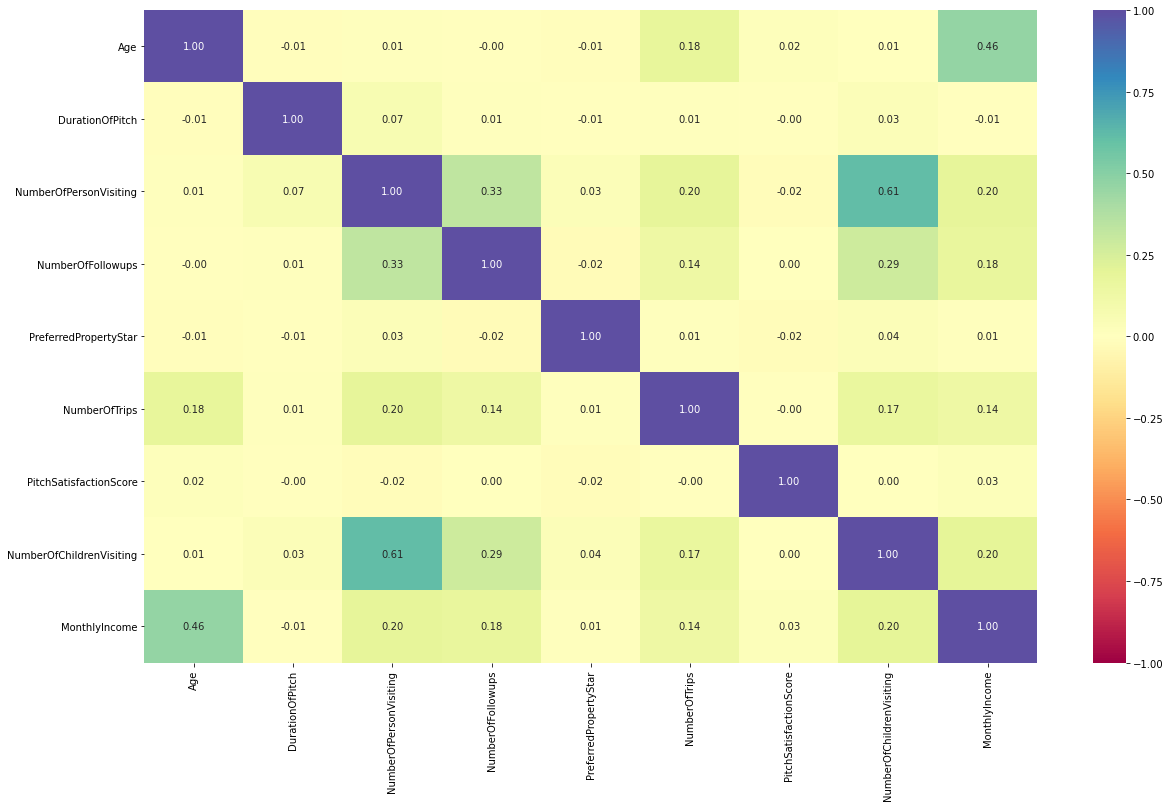

In [43]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

* There are a few variables that are correlated with each other.
* Unsurprisingly, there seems to be some positive correlation between the NumberOfPersonVisiting and NumberOfChildrenVisiting.
* There is an indication of some positive correlation between Age and MonthlyIncome.

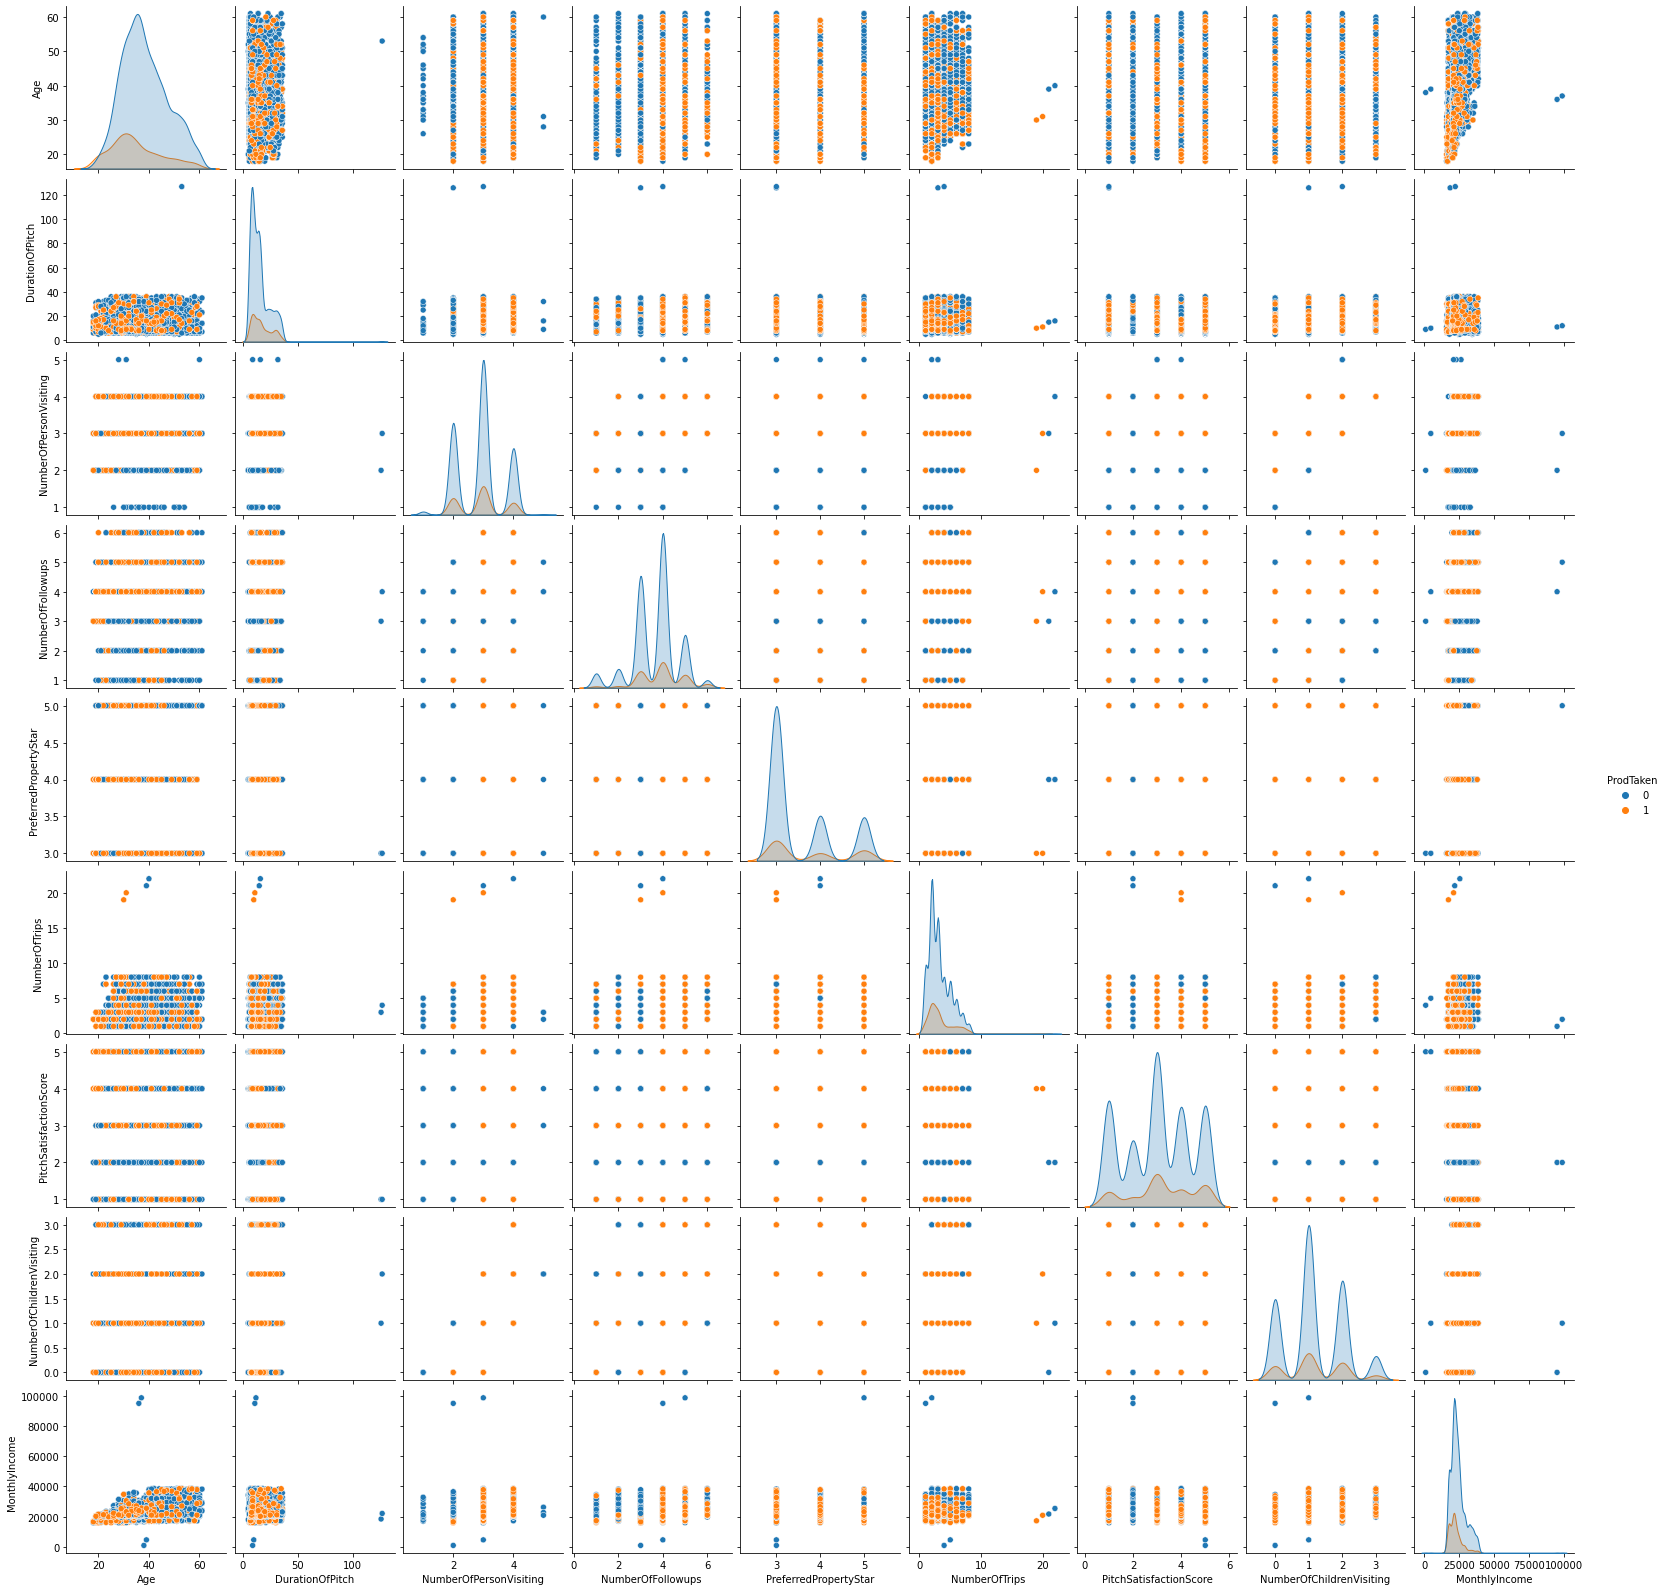

In [44]:
sns.pairplot(data,hue='ProdTaken')
plt.show()

* We can see varying distributions in variables for ProdTaken, we should investigate it further.

### ProdTaken vs Age vs MonthlyIncome vs NumberOfTrips

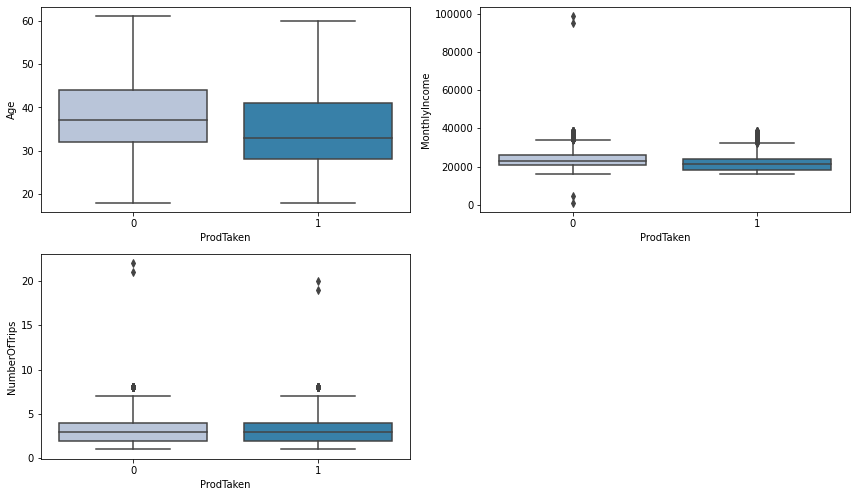

In [45]:
cols = data[['Age','MonthlyIncome','NumberOfTrips']].columns.tolist()
plt.figure(figsize=(12,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["ProdTaken"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     #plt.title(variable)
plt.show()

* Average age of customers who did not purchase a package is higher than customers who did.
* MonthlyIncome and NumberOfTrips are the same across both categories of customers.

### ProdTaken vs DurationOfPitch vs NumberOfFollowups vs PitchSatisfactionScore

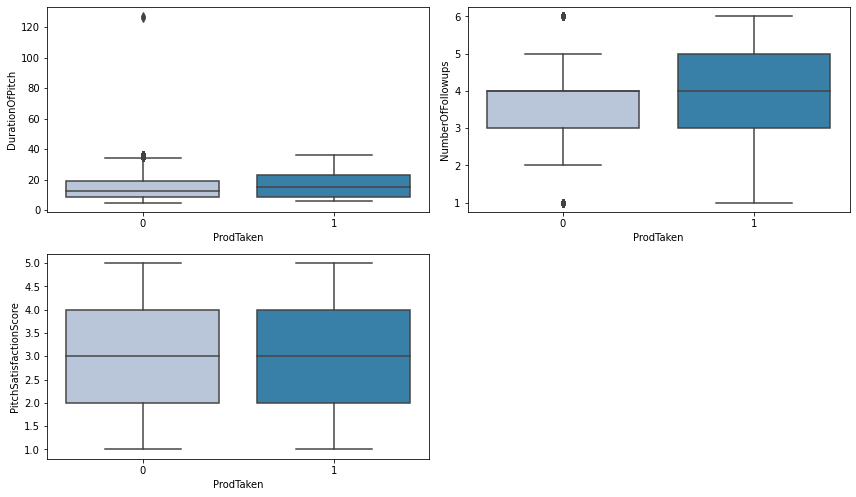

In [46]:
cols = data[['DurationOfPitch', 'NumberOfFollowups',
       'PitchSatisfactionScore']].columns.tolist()
plt.figure(figsize=(12,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["ProdTaken"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     #plt.title(variable)
plt.show()

* Customers who purchased the package where followed up more times than customers who didn't.
* DurationOfPitch and PitchSatisfactionScore are the same across both categories of customers.

### ProdTaken vs NumberOfPersonVisiting vs NumberOfChildrenVisiting vs PreferredPropertyStar

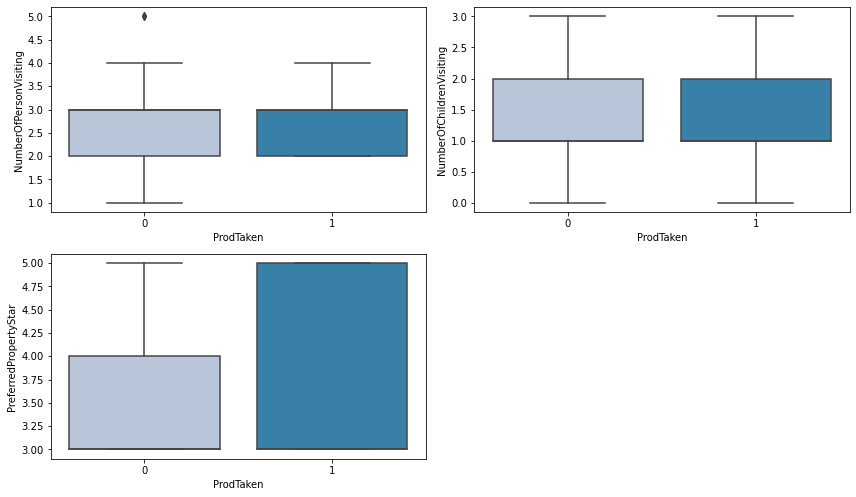

In [47]:
cols = data[['NumberOfPersonVisiting','NumberOfChildrenVisiting','PreferredPropertyStar']].columns.tolist()
plt.figure(figsize=(12,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["ProdTaken"],data[variable],palette="PuBu")
                     plt.tight_layout()
plt.show()

* Customers with higher preferred hotel property rating where more likely to purchase a package.
* NumberOfPersonVisiting and NumberOfChildrenVisiting are the same across both categories of customers.

In [48]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


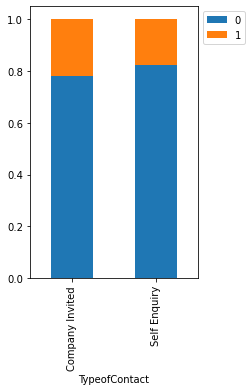

In [49]:
stacked_barplot(data, "TypeofContact", "ProdTaken")

* Customers who were invited by the company have a slightly higher conversion rate.

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


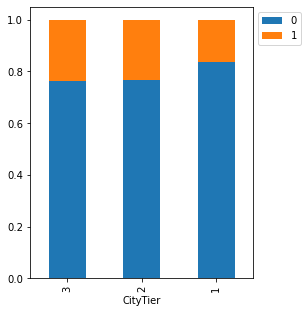

In [50]:
stacked_barplot(data, "CityTier", "ProdTaken")

* Tier 1 customers are less likely to purchase a package than tier 2 and 3 customers.

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


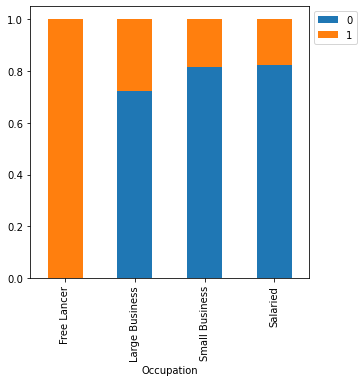

In [51]:
stacked_barplot(data,"Occupation","ProdTaken")

* Large business owners are more likely to purchase a package.
* We might not have enough data for freelancers to conclude.

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


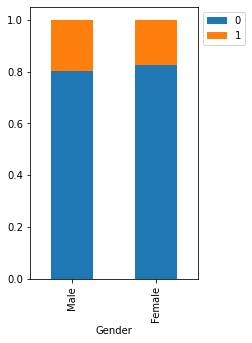

In [52]:
stacked_barplot(data,"Gender","ProdTaken")

* Male customers have a slightly higher conversion rate in comparison to females.

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


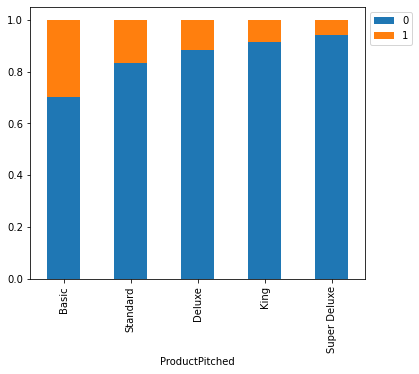

In [53]:
stacked_barplot(data,"ProductPitched","ProdTaken")

* Basic has the highest conversion followed by Standard and Deluxe.
* There seems to be a trend where customers pitched lower priced packages are more likely to purchase than those at the higher end.

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


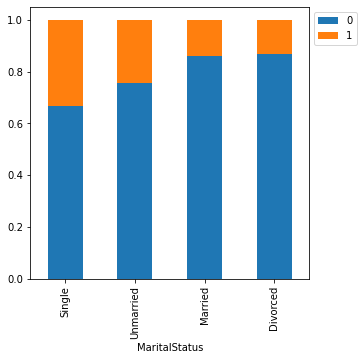

In [54]:
stacked_barplot(data,"MaritalStatus","ProdTaken")

* Divorced and Married customers are less likely to purchase a package than single and unmarried customers.

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


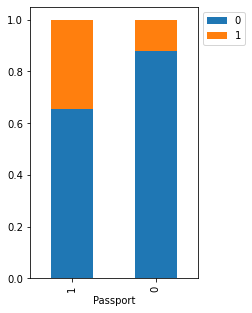

In [55]:
stacked_barplot(data,"Passport","ProdTaken")

* Passport holders are more likely to purchase a package than customers without a passport.

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


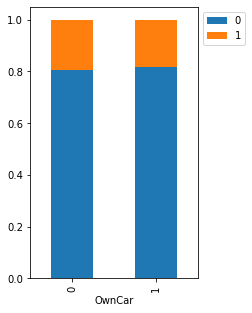

In [56]:
stacked_barplot(data,"OwnCar","ProdTaken")

* There doesnt seem to be any significant difference between customers without a car and car owners.

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


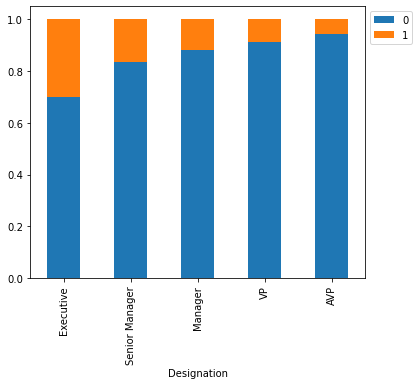

In [57]:
stacked_barplot(data,"Designation","ProdTaken")

* Majority of the converted customers are Executives and Senior Managers.

### MonthlyIncome vs ProductPitched

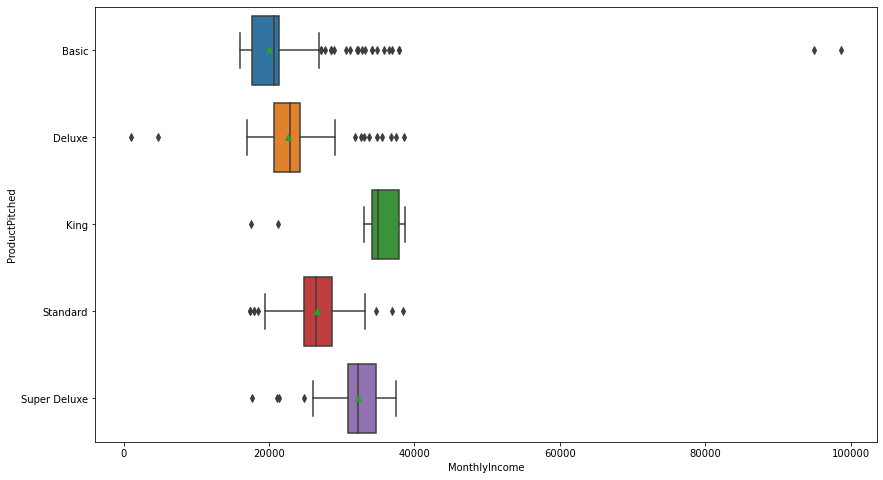

In [58]:
plt.figure(figsize=(14,8))
sns.boxplot(data['MonthlyIncome'],data['ProductPitched'],showmeans = True)
plt.show()

* Basic customers have the lowest income average at 2000 dollars every month.
* Deluxe and Standard customers are averaging income between 2000 to 3000 dollars.Standard customers earning more on average.
* Super Deluxe customers earn just above 3000 on average.
* King customers are the highest earners. They earn from 3000 to 4000 dollars.

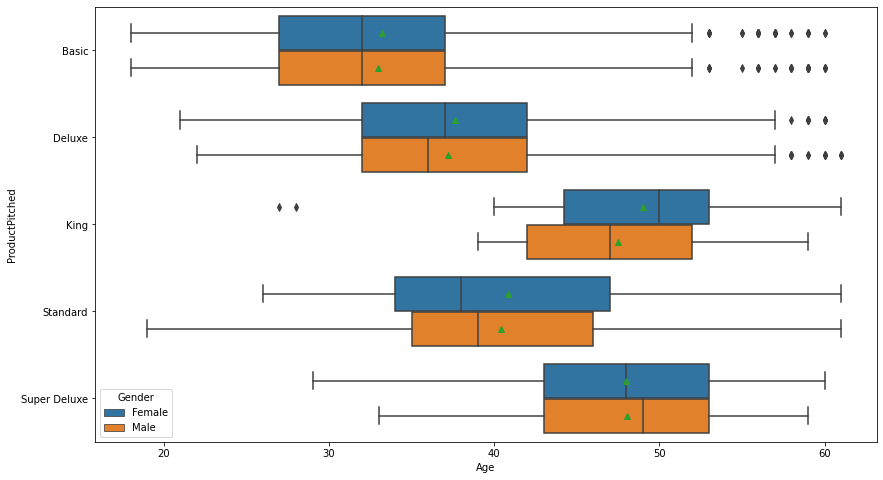

In [59]:
plt.figure(figsize=(14,8))
sns.boxplot(data['Age'],data['ProductPitched'],hue=data['Gender'], showmeans = True)
plt.show()

* Basic customers have an average age just below 35 years.
* Deluxe customers have an average age between 35 to 40 years.
* Standard customers have an average age just above 40 years.
* Super Deluxe customers have an average age just below 50 years.
* King customers have similar averages to Super Deluxe but a much higher average age for female customers.
* We observed slightly higher average age for females in general.

## Let's fix the missing values

In [60]:
#check for missing values
data.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

We can impute the missing values with the median for skewed values and the mean for unskewed values, while also inputting the most frequent value for the categorical variable 'TypeofContact'

In [61]:
# fill nan values with most frequent value
data['TypeofContact'] = data['TypeofContact'].fillna("Self Enquiry")

In [62]:
# fill missing values with mean and median
data['Age'].fillna(data['Age'].median(), inplace=True)
data['DurationOfPitch'].fillna(data['DurationOfPitch'].mean(), inplace=True)
data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].median(), inplace=True)
data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].median(), inplace=True)
data['NumberOfTrips'].fillna(data['NumberOfTrips'].mean(), inplace=True)
data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].median(), inplace=True)
data['MonthlyIncome'].fillna(data['MonthlyIncome'].mean(), inplace=True)

In [63]:
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Outlier Treatment

We will not be treating the outliers as they reflect the true nature of the market.

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

## Split Data

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
* This is done using the `stratify` parameter in the train_test_split function.

In [64]:
X = data.drop(['ProdTaken'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['ProdTaken']

In [65]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3421, 29) (1467, 29)


In [66]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [67]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will purchase the newly introduced travel package and the customer doesn't.
2. Predicting a customer will not purchase the newly introduced travel package and the customer does.

### Which case is more important? 
* Predicting that the customer will not purchase the newly introduced travel package and the customer does i.e. losing on a valuable customer. 

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can predict the potential customer who is going to purchase the newly introduced travel package.

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [68]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [69]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.19,1:0.81} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [70]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)

In [71]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

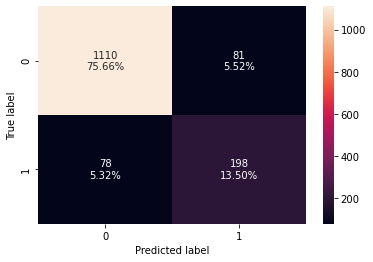

In [72]:
confusion_matrix_sklearn(dtree, X_test, y_test)

**Confusion Matrix -**

* Employee left and the model predicted it correctly that is employee will attrite :  True Positive (observed=1,predicted=1)

* Employee didn't leave and the model predicted employee will attrite : False Positive (observed=0,predicted=1)

* Employee didn't leave and the model predicted employee will not attrite : True Negative (observed=0,predicted=0)

* Employee left and the model predicted that employee won't : False Negative (observed=1,predicted=0)

In [73]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [74]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.891616  0.717391   0.709677  0.713514


* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.

### Bagging Classifier

In [75]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

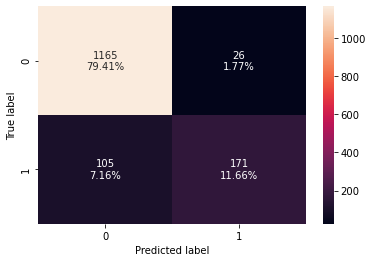

In [76]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [77]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.993569  0.967391   0.998397  0.98265


In [78]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.910702  0.619565    0.86802  0.723044


* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall.

**Bagging Classifier with weighted decision tree**

In [79]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  random_state=1)

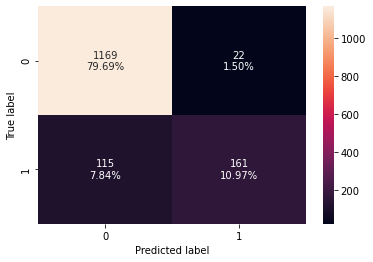

In [80]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [81]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.994154  0.970497   0.998403  0.984252


In [82]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.906612  0.583333   0.879781  0.701525


* Bagging classifier with a weighted decision tree is not able to generalize well on test data in terms of recall.

### Random Forest

In [83]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

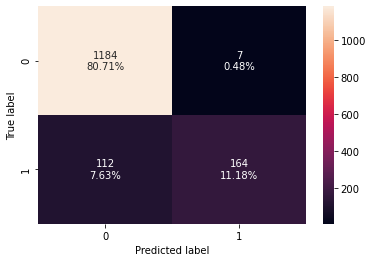

In [84]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [85]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [86]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.918882  0.594203   0.959064  0.733781


* Random Forest is not able to generalize well on the test data in terms of recall.

**Random forest with class weights**

In [87]:
rf_wt = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

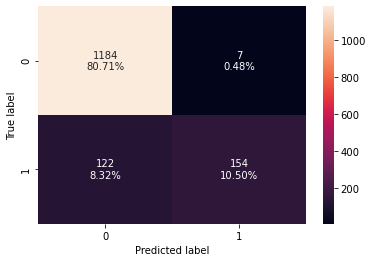

In [88]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [89]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [90]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.912065  0.557971   0.956522  0.704805


* There is no improvement in metrics of weighted random forest as compared to the unweighted random forest.

### Tuning Models

### Using GridSearch for Hyperparameter tuning model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

**Tuning Decision Tree**

In [91]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=5,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

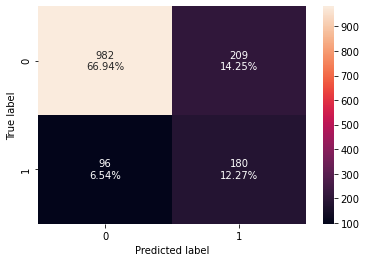

In [92]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [93]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.791581  0.658385   0.462377  0.543242


In [94]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.792093  0.652174   0.462725  0.541353


* Overfitting in decision tree has reduced but the recall has also reduced.

**Tuning Bagging Classifier**

In [95]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                 1: 0.81},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [96]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  max_features=1, n_estimators=15, random_state=1)

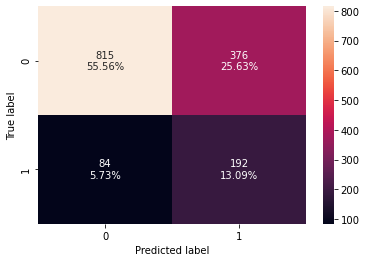

In [97]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [98]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.682841  0.650621     0.3276  0.435777


In [99]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.686435  0.695652   0.338028  0.454976


* Recall has improved but the accuracy and precision of the model has dropped drastically which is an indication that overall the model is making many mistakes.

**Tuning Random Forest**

In [100]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.9, n_estimators=251, random_state=1)

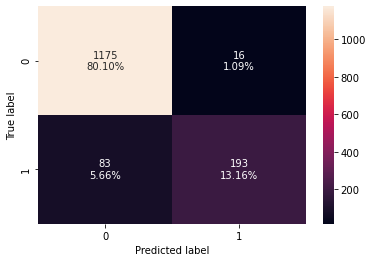

In [101]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [102]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [103]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.932515  0.699275   0.923445  0.795876


* Random forest after tuning has given better performance than un-tuned random forest.

## Boosting Models

### AdaBoost Classifier

In [104]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

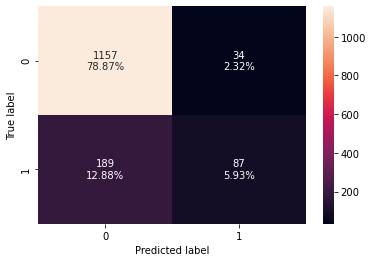

In [105]:
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [106]:
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print("Training performance \n",ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.84829  0.318323   0.719298  0.441335


In [107]:
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print("Testing performance \n",ab_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.847989  0.315217   0.719008  0.438287


* Recall score is poor on train and test sets.

### Hyperparameter Tuning

In [108]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.2000000000000002, n_estimators=100,
                   random_state=1)

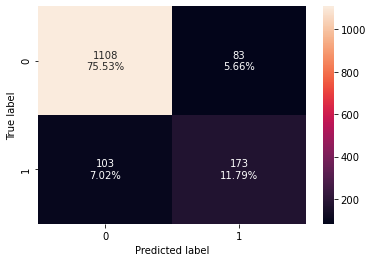

In [109]:
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [110]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.990354  0.96118   0.987241  0.974036


In [111]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Testing performance \n",abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.873211  0.626812   0.675781  0.650376


* Recall has imporoved on the train set but now overfitting.

### Gradient Boosting Classifier

In [112]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

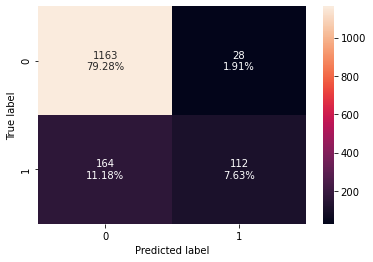

In [113]:
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [114]:
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.88746  0.456522   0.893617  0.604317


In [115]:
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.869121  0.405797        0.8  0.538462


* Low recall scores on train and test set.

### Hyperparameter Tuning

In [116]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

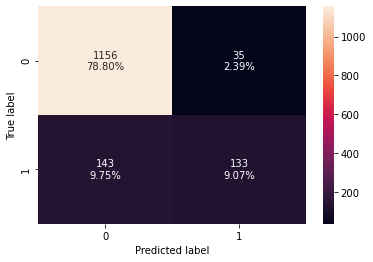

In [117]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [118]:
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.92283  0.625776   0.946009  0.753271


In [119]:
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.878664  0.481884   0.791667  0.599099


* Tuned model doesn't fair much better

### XGBoost Classifier

In [120]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

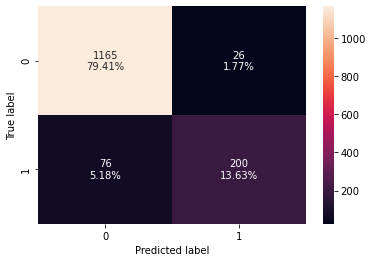

In [121]:
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [122]:
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999708  0.998447        1.0  0.999223


In [123]:
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0   0.93047  0.724638   0.884956  0.796813


* Decent model performance. 
* We will look to reduce overfitting through hyperparameter tuning.

### Hyperparameter Tuning

In [124]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

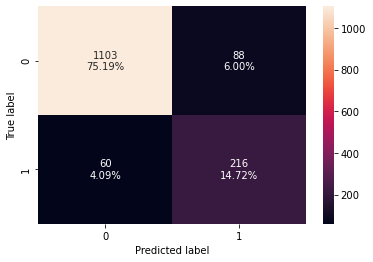

In [125]:
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [126]:
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.983338  0.992236   0.924747  0.957303


In [127]:
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)


Testing performance:
    Accuracy    Recall  Precision        F1
0  0.899114  0.782609   0.710526  0.744828


* The tuned model was able to reduce overfitting significantly.

### Stacking Classifier

In [129]:
estimators = [('Random Forest',rf_estimator), ('AdaBoost',abc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features=0.9,
                                                       n_estimators=251,
                                                       random_state=1)),
                               ('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=1.2000000000000002,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=5,...
                                                 eval_metric='logloss', gamma=0,
    

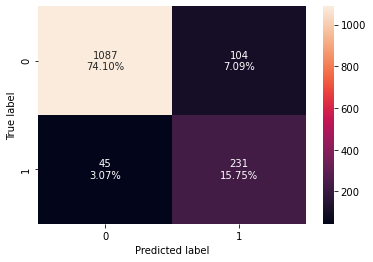

In [130]:
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [131]:
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.978661     1.0   0.898187  0.946363


In [132]:
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.898432  0.836957   0.689552  0.756137


* The stacking classifier gives better performance and lower overfitting than the tuned xgboost.

### Comparing all the models

In [133]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T, bagging_wt_model_train_perf.T,rf_model_train_perf.T,
    rf_wt_model_train_perf.T,dtree_estimator_model_train_perf.T, bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T,ab_classifier_model_train_perf.T,abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.993569,0.994154,1.0,1.0,0.791581,0.682841,1.0,0.848290,0.990354,0.887460,0.922830,0.999708,0.983338,0.978661
Recall,1.0,0.967391,0.970497,1.0,1.0,0.658385,0.650621,1.0,0.318323,0.961180,0.456522,0.625776,0.998447,0.992236,1.000000
Precision,1.0,0.998397,0.998403,1.0,1.0,0.462377,0.327600,1.0,0.719298,0.987241,0.893617,0.946009,1.000000,0.924747,0.898187
F1,1.0,0.982650,0.984252,1.0,1.0,0.543242,0.435777,1.0,0.441335,0.974036,0.604317,0.753271,0.999223,0.957303,0.946363


In [134]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,
    rf_wt_model_test_perf.T,dtree_estimator_model_test_perf.T, bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.891616,0.910702,0.906612,0.918882,0.912065,0.792093,0.686435,0.932515,0.847989,0.873211,0.869121,0.878664,0.930470,0.899114,0.898432
Recall,0.717391,0.619565,0.583333,0.594203,0.557971,0.652174,0.695652,0.699275,0.315217,0.626812,0.405797,0.481884,0.724638,0.782609,0.836957
Precision,0.709677,0.868020,0.879781,0.959064,0.956522,0.462725,0.338028,0.923445,0.719008,0.675781,0.800000,0.791667,0.884956,0.710526,0.689552
F1,0.713514,0.723044,0.701525,0.733781,0.704805,0.541353,0.454976,0.795876,0.438287,0.650376,0.538462,0.599099,0.796813,0.744828,0.756137


* Majority of the models are overfitting the training data.
* Recall score was quite low for majority of our models.
* Bagging Estimator optimized Recall at the expense of Accuracy, Precision and F1-score.
* Tuned XGBoost performed okay on training and test set.
* Stacking Classifier performed well on training and test set with the least overfitting.

### Feature importance of Tuned XGBoost

In [135]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport_1                   0.116377
Designation_Executive        0.100905
CityTier_3                   0.058554
MaritalStatus_Single         0.051147
ProductPitched_Super Deluxe  0.045486
ProductPitched_Standard      0.043971
MaritalStatus_Married        0.041903
CityTier_2                   0.038823
Occupation_Large Business    0.038271
MaritalStatus_Unmarried      0.037742
NumberOfTrips                0.033127
PreferredPropertyStar        0.032386
ProductPitched_Deluxe        0.030967
NumberOfFollowups            0.030881
DurationOfPitch              0.030563
Age                          0.030370
PitchSatisfactionScore       0.029742
TypeofContact_Self Enquiry   0.029182
Gender_Male                  0.025800
MonthlyIncome                0.024672
OwnCar_1                     0.024100
ProductPitched_King          0.022536
NumberOfChildrenVisiting     0.022386
Occupation_Salaried          0.021984
NumberOfPersonVisiting       0.019704
Occupation_S

In [136]:
feature_names = X_train.columns

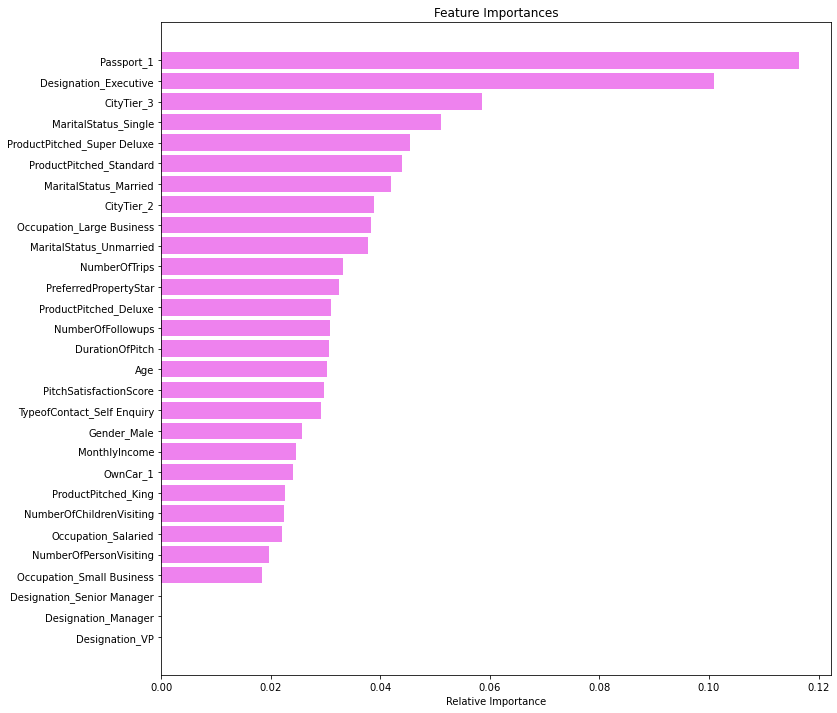

In [137]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Passport is the most important feature for prediction followed by Designation, CityTier, MaritalStatus and ProductPitched.

## Business Insights and Recommendations

* We have been able to build a predictive model to predict which customer is more likely to purchase the newly introduced travel package.

**Factors that influence prediction**:

* Passport: Customers in possession of a passport are more likely to purchase the newly introduced travel package, which is also logical as customers without a passport will have travel restrictions - the company should make sure to target customers with a passport.

* Designation: Customers in Executive positions are more likely to purchase the newly introduced travel package - the company should seek to favour marketing to Executives over other designations.

* CityTier: Customers in Tier 3 are more likely to purchase the newly introduced travel package- the company should seek to make sure it dispenses adequate marketing efforts in this location.

* MaritalStatus: Married Customers are more likely to purchase the newly introduced travel package - the company can provide incentives for married couples to purchase the package. 

* ProductPitched: Customers pitched Super Deluxe and Standard are more likely to purchase the newly introduced travel package - the company should look to pitch the new travel package to customers who were previously pitched the Super Deluxe and Standard package.

* Occupation: Customers with large businesses are more likely to purchase the newly introduced travel package - the company should look to make contact with large business owners for a higher conversion rate.

* As NumberOfTrips, NumberOfFollowups, PreferredPropertyStar and DurationOfPitch increases, probability of purchasing the newly introduced travel package increases.